Сегодня мы поговорим о морфологических анализаторах для русского языка и некоторых других языков.  

http://web-corpora.net/wsgi/mystemplus.wsgi/mystemplus/compare_table/ сравнение тэггеров.  

Не забудьте установить нужные библиотеки.

In [ ]:
!pip install pymystem3

In [ ]:
import re

In [ ]:
text_rus = '''И пунша пламень голубой.
Люблю воинственную живость
Потешных Марсовых полей,
Пехотных ратей и коней
Однообразную красивость,
В их стройно зыблемом строю
Лоскутья сих знамён победных,
Сиянье шапок этих медных,
Насквозь простреленных в бою.'''

Токенизация через nltk:

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
text_tokens_nltk = word_tokenize(text_rus)
print(text_tokens_nltk)

['И', 'пунша', 'пламень', 'голубой', '.', 'Люблю', 'воинственную', 'живость', 'Потешных', 'Марсовых', 'полей', ',', 'Пехотных', 'ратей', 'и', 'коней', 'Однообразную', 'красивость', ',', 'В', 'их', 'стройно', 'зыблемом', 'строю', 'Лоскутья', 'сих', 'знамён', 'победных', ',', 'Сиянье', 'шапок', 'этих', 'медных', ',', 'Насквозь', 'простреленных', 'в', 'бою', '.']


Mystem -- свободно распространяемая библиотека с закрытым кодом. Майстем сам умеет токенизировать. Он устанавливает словарную форму (лемму), определяет часть речи и даёт разную морфологическую информацию, при этом выбирая один из наиболее вероятных разборов.

In [ ]:
from pymystem3 import Mystem

# сохраняем класс в переменную
mystem = Mystem()

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [ ]:
text_analyzed = mystem.analyze(text_rus)
text_analyzed

In [ ]:
print(text_analyzed[4])

{'analysis': [{'lex': 'пламень', 'wt': 1, 'gr': 'S,неод=(им,ед,муж|вин,ед,муж)'}], 'text': 'пламень'}


In [ ]:
print(type(text_analyzed))

<class 'list'>


Можно делать отдельные вещи:

In [ ]:
text_lemmatized = mystem.lemmatize(text_rus)
print(text_lemmatized)

['и', ' ', 'пунш', ' ', 'пламень', ' ', 'голубой', '.', '\n', 'любить', ' ', 'воинственный', ' ', 'живость', '\n', 'потешный', ' ', 'марсовой', ' ', 'поле', ',\n', 'пехотный', ' ', 'рать', ' ', 'и', ' ', 'конь', '\n', 'однообразный', ' ', 'красивость', ',\n', 'в', ' ', 'их', ' ', 'стройно', ' ', 'зыбить', ' ', 'строй', '\n', 'лоскут', ' ', 'сей', ' ', 'знамя', ' ', 'победный', ',\n', 'сияние', ' ', 'шапка', ' ', 'этот', ' ', 'медный', ',\n', 'насквозь', ' ', 'прострелить', ' ', 'в', ' ', 'бой', '.', '\n']


Можно склеить всё в один лемматизированный текст:

In [ ]:
new_text_lemmatized = ''.join(text_lemmatized)
print(new_text_lemmatized)

и пунш пламень голубой.
любить воинственный живость
потешный марсовой поле,
пехотный рать и конь
однообразный красивость,
в их стройно зыбить строй
лоскут сей знамя победный,
сияние шапка этот медный,
насквозь прострелить в бой.



In [ ]:
# сделаем все красиво с индексами и доступом по ключам

print('Слово - ', text_analyzed[0]['text'])
print('Разбор слова - ', text_analyzed[0]['analysis'][0])
print('Лемма слова - ', text_analyzed[0]['analysis'][0]['lex'])
print('Грамматическая информация слова2 - ', text_analyzed[0]['analysis'][0]['gr'])

Слово -  И
Разбор слова -  {'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}
Лемма слова -  и
Грамматическая информация слова2 -  CONJ=


In [ ]:
text_analyzed[0] #чтобы понять, что происходит наверху

{'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'И'}

Функция, чтобы прикрепить частеречные теги к словам

In [ ]:
def process_mystem_analysis(analysis_results):
    """
    Преобразует результаты анализа mystem в список токенов формата "слово_ЧастьРечи"

    Параметры:
    analysis_results (list): Результат работы метода mystem.analyze()

    Возвращает:
    list: Список строк в формате "слово_ЧастьРечи"
    """
    result_tokens = []

    for item in analysis_results:
        # Пропускаем пробелы и знаки препинания
        if item.get('text', '').strip() == '' or 'analysis' not in item:
            continue

        # Получаем текст токена
        token_text = item['text'].lower()

        # Если есть анализ и он не пустой
        if 'analysis' in item and item['analysis']:
            # Берем первый (наиболее вероятный) вариант анализа
            first_analysis = item['analysis'][0]

            # Извлекаем часть речи из поля 'gr'
            if 'gr' in first_analysis:
                # Извлекаем первую часть до запятой или знака равенства
                pos_tag = first_analysis['gr'].split(',')[0].split('=')[0]

                # Формируем токен в формате "слово_ЧастьРечи"
                formatted_token = f"{token_text}_{pos_tag}"
                result_tokens.append(formatted_token)
            else:
                # Если нет информации о части речи, добавляем просто слово
                result_tokens.append(token_text)
        else:
            # Если нет анализа, добавляем просто слово
            result_tokens.append(token_text)

    return result_tokens

In [ ]:
# Преобразование в список токенов
tagged_tokens = process_mystem_analysis(text_analyzed)

# Вывод результата
print(" ".join(tagged_tokens))

и_CONJ пунша_S пламень_S голубой_A люблю_V воинственную_A живость_S потешных_A марсовых_S полей_S пехотных_A ратей_S и_CONJ коней_S однообразную_A красивость_S в_PR их_APRO стройно_ADV зыблемом_V строю_S лоскутья_S сих_APRO знамён_S победных_A сиянье_S шапок_S этих_APRO медных_A насквозь_ADV простреленных_V в_PR бою_S


Можно посмотреть предсказания для отдельных слов:

In [ ]:
mystem.analyze('стекла')

[{'analysis': [{'lex': 'стекло',
    'wt': 0.9946103594,
    'gr': 'S,сред,неод=(вин,мн|род,ед|им,мн)'}],
  'text': 'стекла'},
 {'text': '\n'}]

In [ ]:
mystem.analyze('стали')

[{'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': '\n'}]

In [ ]:
mystem.analyze('стекла и стали нам не хватает')

In [ ]:
mystem.analyze('кринжевать')

In [ ]:
mystem.analyze('Глокая куздра штеко будланула бокра и курдячит бокрёнка')

Некоторые вещи, которые могут встретиться в нотации:  

const (  
	Dictionary  = 0        // слово из словаря  
	Bastard     = 1        // не словарное  
	Sob         = 2        // из "быстрого словаря"  
	Prefixoid   = 4        // словарное + стандартный префикс (авто- мото- кино- фото-) всегда в компании с Bastard или Sob  
	Foundling   = 8        // непонятный набор букв, но проходящий в алфавит  
	BadRequest  = 16       // доп. флаг.: "плохая лемма" при наличии "хорошей" альтернативы ("махать" по форме "маша")  
	FromEnglish = 65536    // переведено с английского  
	ToEnglish   = 131072   // переведено на английский  
	Untranslit  = 262144   // "переведено" с транслита  
	Overrode    = 1048576  // текст леммы был перезаписан  
	Fix         = 16777216 // слово из фикс-листа  
    
https://pkg.go.dev/github.com/dveselov/mystem#section-readme

In [ ]:
mystem.analyze('мы стали более лучше одеваться')

In [ ]:
mystem.analyze('сплав стали')

Плюсы Mystem:
- В целом высокое качество;
- Разрешается омонимия;
- Учитывается контекст при разборе;
- Основан на разметке НКРЯ.

Минусы Mystem:
- Медленный;  
- Требует некоторой работы для вывода на экран в удобочитаемом виде.

NLTK для английского языка

In [ ]:
from nltk.tokenize import word_tokenize
import nltk

Список тэгов (Universal dependencies): https://universaldependencies.org/u/pos/
Список частеречных тэгов (Penn): https://cs.nyu.edu/~grishman/jet/guide/PennPOS.html   

In [ ]:
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [ ]:
nltk.download('averaged_perceptron_tagger_eng')

In [ ]:
text_2 = 'I love cats.'
text_tok = word_tokenize(text_2) #мы импортировали уже знакомый вам токенизатор из NLTK. Токенизация нужна для разметки в этой библиотеке
tagged = nltk.pos_tag(text_tok)
tagged

In [ ]:
text_tok = word_tokenize(text_rus)
tagged = nltk.pos_tag(text_tok, lang='rus') #тэгсет похож на НКРЯ
tagged

Можно "подклеить" для удобства тэги к слову.

In [ ]:
list_of_tagged = []
for elem in tagged:
    tag_tog = '_'.join(elem)
    list_of_tagged.append(tag_tog)
print(list_of_tagged)

['I_PRP', 'love_VBP', 'cats_NNS', '._.']


In [ ]:
# Имя файла
text = "text_morph.txt"

# Чтение файла
with open(text, 'r', encoding='utf-8') as file:
    txt = file.read()

print(f"Файл успешно прочитан. Длина текста: {len(txt)} символов")
print(f"Тип переменной text_string: {type(txt)}")
txt[0:50]

In [ ]:
tagged_list = []
tokenized_txt = word_tokenize(txt)
for tagged_w in nltk.pos_tag(tokenized_txt, tagset='universal'):
  tagged_list.append('_'.join(tagged_w))
print(' '.join(tagged_list))
resulting_text = ' '.join(tagged_list)

Сколько у нас частей речи определенного вида?

In [ ]:
#для этого нам понадобятся регулярные выражения
number_of_pos = re.findall('[a-zA-Z]+_ADJ', resulting_text)
print(f'Your text has {len(number_of_pos)} adjectives.')

In [ ]:
from nltk import FreqDist

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

Посмотрим на распределение без учёта частей речи:

In [ ]:
stop_words = set(stopwords.words("english"))

In [ ]:
filtered_list = []
for word in tokenized_txt:
  if word.casefold() not in stop_words:
    filtered_list.append(word)
    new_text = ' '.join(filtered_list) #второй этап - убрали стоп-слова

    tokenizedtxt = word_tokenize(new_text.lower())
    frequency_distribution_1 = FreqDist(tokenizedtxt)

In [ ]:
frequency_distribution_1.plot(30, cumulative=False)

Повторим то же самое, только с учётом частеречных тэгов:

In [ ]:
tagged_words = nltk.pos_tag(tokenized_txt, tagset='universal')

tagged_list = ['_'.join(tagged_w) for tagged_w in tagged_words]

resulting_text = ' '.join(tagged_list)

processed_tokens = word_tokenize(resulting_text.lower())

frequency_distribution_2 = FreqDist(processed_tokens)


In [ ]:
frequency_distribution_2.plot(30, cumulative=False)

**Задание 1.** Извлеките ключевые слова из любых 2х текстов на английском и русском языке (не менее 4000 символов) тремя способами:  
    1) Используя просто токены;  
    2) Разметив на части речи;  
    3) Оставив только леммы или стеммы. Отличаются ли результат в топ-30?   
Визуализируйте с помощью frequency_distribution.plot. и библиотеки matplotlib

In [22]:
text_rus = '''Пиво - самый древний алкогольный налиток в истории человечества. Он занимает особое место в потреблении напитков, имеет огромную популярность и широко распространен у многих народов. Благодаря приятному вкусу, тонизирующему жаждоутоляющему действию, пиво пользуется большим спросом у населения. Являясь слабоалкогольным напитком, пиво во многих странах выступает соперником крепких алкогольных изделий. Пиво содержит ряд важных компонентов, среди которых основное место зани¬мают витамины, минеральные вещества и органические кислоты. Имеются в незначи¬тельном количестве углеводы, азотсодержащие вещества. Это определяет высокую пищевую и энергетическую ценность пива по сравнению с другими алкогольными напит¬ками. Поэтому производство пива является весьма актуальным.
Цель данной работы - изучить технологию производства светлого пива.
Для достижения цели необходимо решить ряд задач:
-	рассмотреть пользу и вред светлого пива;
-	рассмотреть технологию производства светлого пива.
Пиво - безобидный напиток, если употреблять его в умеренном количестве, а тем более, если пить светлое пиво.
Начнем с хорошего. В светлом пиве содержится антиоксидант, который, по мнению специалистов, может предотвратить рак кожи. Данный факт объявили британ¬ские исследователи после ряда различных экспериментов. Они взяли несколько пар близнецов-добровольцев, которым нужно было просто загорать на пляже, задействовав при этом какую-нибудь вредную привычку.
Итак, кто-то курил, кто-то пил пиво, а кто^ — вино. Но наименьшее поражение получили те близнецы, которые ежедневно баловали себя полулитром светлого пива.
Это связано с тем, что солнечные лучи убивают клетки Лангерганса, которые призваны защищать организм от солнца. Это своеобразный элемент иммунитета, ко¬торый не выдерживает сегодняшней солнечной радиации. Благодаря светлому пиву, антиоксидант помогает вывести свободные радикалы, и именно это помогает иммунной системе лучше справляться с радиацией. [3]
Международная конференция, на которой были собраны ученые и медики, сде¬лала вывод, что пиво — это синоним здоровому образу жизни. Светлое пиво помогает предотвратить ожирение, диабет и болезни сердца. Другие источники говорят обратное, что пиво не рекомендуется пить тем, у кого наблюдается диабет, а также цирроз печени или язва желудка.
Некоторые исследования показали, что светлое пиво благоприятно влияет на работу мозга, по статистике люди, которые употребляют этот золотистый ароматный напиток, зарабатывают больше на 10-15%, нежели трезвенники.
Самый главный недостаток любого пива - это женские гормоны, которые проявляются у мужчин, которые им злоупотребляют. Это означает, что у мужчин начинает расти живот, откладываются жиры, быстрее наступает облысение.
Пиво приносит вред и женщинам, которые вынашивают ребенка или кормят грудью, потому что содержащиеся в пиве вещества нарушают мозговую деятельность младенца. Люди, которые любят посидеть перед телевизором с бутылочкой пива, чаще всего имеют лишний вес. Хоть в светлом пиве и не содержится жир, но всего в одном стакане таится 120 калорий.
Не смотря на все недостатки пива, его пили и продолжают пить. Оно вкусное, прохладное, снимает усталость, позволяет расслабиться, прибавляет веселья. Главное - знать меру. [2]
При всём многообразии используемого сырья и способов варки пива, современная технология производства пива включает следующие этапы:
1.	Очистка и дробление солода
Очистка солода предусматривает его полировку для удаления пыли и ростков, а также металлических примесей. Далее солод взвешивают на автоматических весах и направляют в дробилку. Процесс дробления ведут тщательно, так как от состава помола во многом зависит выход экстрактивных веществ. Чем тоньше помол, тем полнее извлекаются экстрактивные вещества. Однако при очень тонком помоле происходит значительное измельчение оболочки зерен, в результате чего в фильтрационном аппарате создается плотный слой, что затрудняет фильтрацию и извлечение экстрактивных веществ из дробины. Кроме того, при значительном измельчении оболочки из нее извлекаются дубильные и горькие вещества, что ухудшает вкус пива.'''

text_eng = '''It’s everywhere, as the author learned the hard way while making as little contact as possible with machine learning and generative artificial intelligence.
When I decided to live without artificial intelligence for 48 hours, I figured it would affect some parts of my routine. I knew I wouldn’t be able to watch Netflix-recommended documentaries or read marketing emails written by bots, for instance. That I could deal with.
What I didn’t expect was that my attempt to avoid all interactions with A.I. and machine learning would affect nearly every part of my life — what I ate, what I wore, how I got around.
I undertook this experiment with the goal of seeing firsthand just how prevalent A.I. is in our everyday lives. Most people are aware that it peppers our social media feeds with targeted ads and powers the chatbots on airline reservation sites. I wanted to identify all the A.I. hiding in plain sight, and to find out what life would be like without it. I would spend two days as the No A.I. Guy.
“Good luck with that!” said Jeff Wilser, the host of the podcast “AI-Curious.” “I used to say that if you want to avoid A.I., you should go be a goat herder in the mountains. Now I can’t even say that, because goat herders probably use it, too, wittingly or not. For starters, they check the weather, and nowadays almost every weather prediction is made with A.I.”
While researching my subject, I encountered wildly conflicting opinions. Is A.I. overhyped, merely a glorified spell-check, as some people insisted in interviews with me? Or is it the biggest discovery since fire (actually bigger than fire, since it will replace humans), as others claimed?
Is it taking away our freedom of choice by forcing us to obey biased algorithms? Or is it making our lives better in a thousand small ways, as Garrett Winther, the chief product officer of the venture capital firm Newlab, argued.
“People think A.I. is scary,” Mr. Winther told me, “but, really, it’s improving our lives in ways we don’t even notice, allowing us to breathe easier. Literally.” He cited a recent New York State A.I. program that used the technology to monitor the air for abnormalities such as methane leaks.
Before I started my experiment on a random Monday in October, I had to answer a fundamental question: How should I define A.I.?
Many people associate the term with generative A.I., which burst onto the scene in 2022. It’s the technology that churns out college English papers and concocts images of smiling customers for soft drink ads. But the A.I. umbrella  also covers other types of programs capable of learning and evolving — including machine learning, which has been widespread since the 2000s. A machine learning program updates itself or its predictions based on new data. When the Waze app finds a shortcut to your sister’s house, you can thank machine learning.
To be A.I.-free, I decided, I would avoid both Gen A.I. and machine learning. I would be a purist.
It Begins
From the moment I woke up in my New York apartment on Day 1, I realized that Mr. Wilser was correct to warn me about A.I.’s omnipresence.
Still in bed, I reflexively grabbed my iPhone so that I could hold it in front of my face and unlock the screen. But no. Facial recognition runs on A.I. I typed in my passcode like it was 2017.
What could I do with my phone now that it was open? Not much. No Facebook, no Instagram: Social media feeds are determined by A.I. and littered with A.I.-generated ads. How about a podcast? Nope. Many podcasts use A.I. editing programs to remove the “ums” and awkward silences.
Should I check the news? According to a 2024 Associated Press survey, 70 percent of journalists reported that their organizations used generative A.I. tools for research or other purposes. I would be cut off from current events — which could be a nice bonus.
Checking my email was also a no-no. Gmail uses machine learning to weed out spam. I put my iPhone in a drawer.
In the kitchen, my wife, Julie, flicked on the lights. I flicked them off.
“Are you kidding me?” she asked, patiently.'''

In [ ]:
!pip install nltk pymorphy3 spacy matplotlib
!python -m spacy download en_core_web_sm

import nltk
import spacy
import matplotlib.pyplot as plt
import string

from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
import pymorphy3

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

stop_ru = set(stopwords.words('russian'))
stop_en = set(stopwords.words('english'))
punct = set(string.punctuation)

morph = pymorphy3.MorphAnalyzer()
stemmer_ru = SnowballStemmer("russian")
stemmer_en = SnowballStemmer("english")
lemmatizer_en = WordNetLemmatizer()

nlp_en = spacy.load("en_core_web_sm")

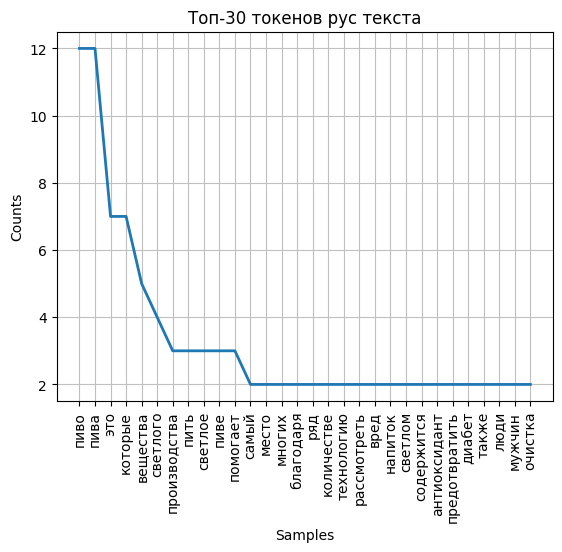

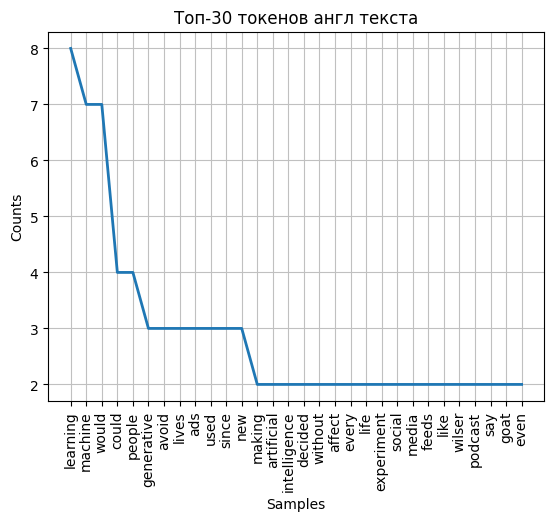

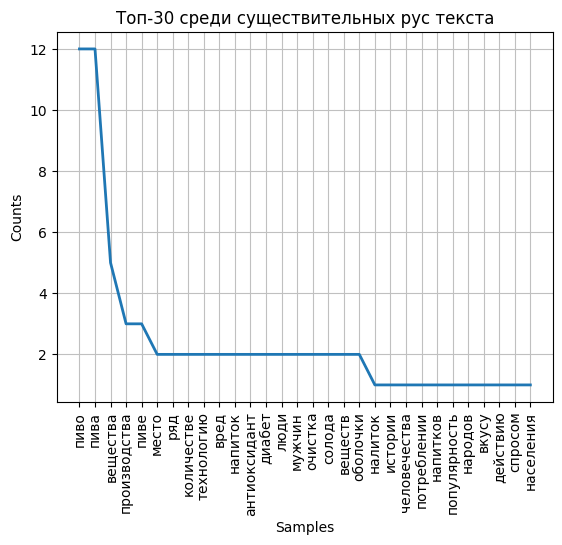

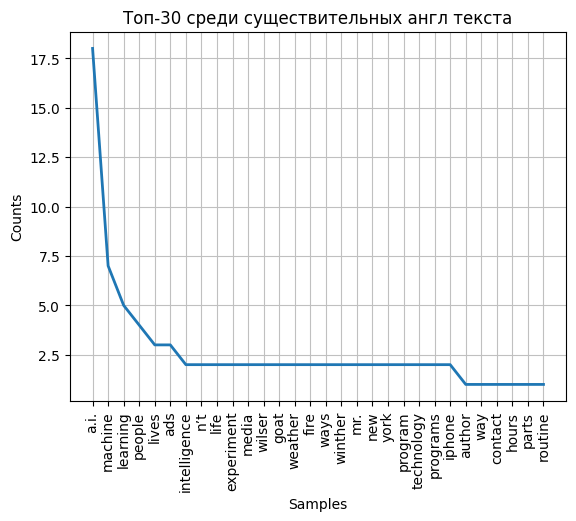

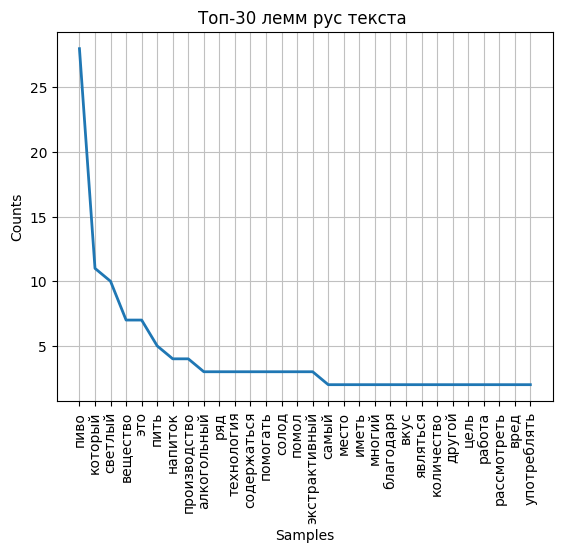

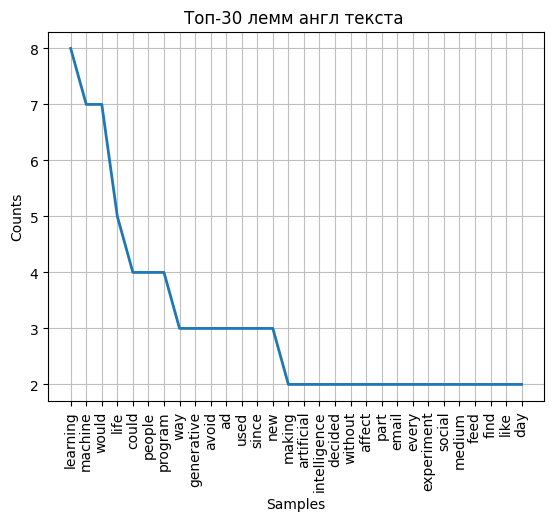

Русский текст
Tokens: [('пиво', 12), ('пива', 12), ('это', 7), ('которые', 7), ('вещества', 5), ('светлого', 4), ('производства', 3), ('пить', 3), ('светлое', 3), ('пиве', 3)]
POS: [('пиво', 12), ('пива', 12), ('вещества', 5), ('производства', 3), ('пиве', 3), ('место', 2), ('ряд', 2), ('количестве', 2), ('технологию', 2), ('вред', 2)]
Lemmas: [('пиво', 28), ('который', 11), ('светлый', 10), ('вещество', 7), ('это', 7), ('пить', 5), ('напиток', 4), ('производство', 4), ('алкогольный', 3), ('ряд', 3)]

Английский текст
Tokens: [('learning', 8), ('machine', 7), ('would', 7), ('could', 4), ('people', 4), ('generative', 3), ('avoid', 3), ('lives', 3), ('ads', 3), ('used', 3)]
POS: [('a.i.', 18), ('machine', 7), ('learning', 5), ('people', 4), ('lives', 3), ('ads', 3), ('intelligence', 2), ('n’t', 2), ('life', 2), ('experiment', 2)]
Lemmas: [('learning', 8), ('machine', 7), ('would', 7), ('life', 5), ('could', 4), ('people', 4), ('program', 4), ('way', 3), ('generative', 3), ('avoid', 3)]


In [24]:
# С помощью токенов
tokens_ru = [
    w.lower() for w in word_tokenize(text_rus)
    if w.isalpha() and w.lower() not in stop_ru
]

tokens_en = [
    w.lower() for w in word_tokenize(text_eng)
    if w.isalpha() and w.lower() not in stop_en
]

fd_tokens_ru = FreqDist(tokens_ru)
fd_tokens_en = FreqDist(tokens_en)

fd_tokens_ru.plot(30, title="Топ-30 токенов рус текста")
plt.show()

fd_tokens_en.plot(30, title="Топ-30 токенов англ текста")
plt.show()

# С помощью разметки существительных
pos_ru = []
for word in tokens_ru:
    parsed = morph.parse(word)[0]
    if parsed.tag.POS == 'NOUN':
        pos_ru.append(word)

fd_pos_ru = FreqDist(pos_ru)
fd_pos_ru.plot(30, title="Топ-30 среди существительных рус текста")
plt.show()

doc = nlp_en(text_eng)
pos_en = [
    token.text.lower() for token in doc
    if token.pos_ in ("NOUN", "PROPN") and token.text.lower() not in stop_en
]

fd_pos_en = FreqDist(pos_en)
fd_pos_en.plot(30, title="Топ-30 среди существительных англ текста")
plt.show()

# С помощью лемм
lemmas_ru = [morph.parse(w)[0].normal_form for w in tokens_ru]
fd_lemmas_ru = FreqDist(lemmas_ru)

fd_lemmas_ru.plot(30, title="Топ-30 лемм рус текста ")
plt.show()

lemmas_en = [lemmatizer_en.lemmatize(w) for w in tokens_en]
fd_lemmas_en = FreqDist(lemmas_en)

fd_lemmas_en.plot(30, title="Топ-30 лемм англ текста ")
plt.show()

# Сравнение
print("Русский текст")
print("Tokens:", fd_tokens_ru.most_common(10))
print("POS:", fd_pos_ru.most_common(10))
print("Lemmas:", fd_lemmas_ru.most_common(10))

print("\nАнглийский текст")
print("Tokens:", fd_tokens_en.most_common(10))
print("POS:", fd_pos_en.most_common(10))
print("Lemmas:", fd_lemmas_en.most_common(10))